# Lab 3. 数据统计指标和可视化

DataFrame 对象本身提供了众多描述数据的方法，如 mean()、median()、mode()等，参见：

https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

除了获取整个数据集的全局信息之外，经常还需要对数据进行分组分析。Pandas 提供的 groupby() 语句可以根据指定条件对数据进行分组，结合累计方法（类似于聚集函数）进行分组后的数据统计。

## 1. GroupBy 数据分组

Pandas 提供的主要分组方法是 groupby() 语句，主要累计方法（类似于聚集函数）有 count()、first()、last()、mean()、median()、min()、max()、std()、var()、mad()（均值绝对偏差）、prod()（所有项乘积）、sum()（所有项求和）等。

参考文档：
https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html


### 1.1 groupby() 基本用法

<b>方法一：按列取值</b>

groupby() 方法返回的是一个专门的数据类型： DataFrameGroupBy 对象（或者是 SeriesGroupBy 对象），<p color="red">在进行下一步聚合运算之前，该对象不会计算。</p>比如，下面代码可以获得不同鸢尾花类型下所有花瓣长度的中位数。

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.DataFrame(pd.read_csv('./data/iris.csv',header=None))
df.columns = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class']
df['class'] = df['class'].astype('category')
print(df.describe())
df.head(20)

       sepallength  sepalwidth  petallength  petalwidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
df.groupby('class')['petallength'].median()

<b>方法二：按组迭代</b>

GroupBy 对象支持直接按组进行迭代，返回的每一组都是 Series 或 DataFrame。下面这个例子统计每种方法有多少条记录。

In [4]:
for (c, group) in df.groupby('class'):
    print(group.info())
    print("{0:30s} shape={1}".format(c, group.shape))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 5 columns):
sepallength    50 non-null float64
sepalwidth     50 non-null float64
petallength    50 non-null float64
petalwidth     50 non-null float64
class          50 non-null category
dtypes: category(1), float64(4)
memory usage: 2.1 KB
None
Iris-setosa                    shape=(50, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 50 to 99
Data columns (total 5 columns):
sepallength    50 non-null float64
sepalwidth     50 non-null float64
petallength    50 non-null float64
petalwidth     50 non-null float64
class          50 non-null category
dtypes: category(1), float64(4)
memory usage: 2.1 KB
None
Iris-versicolor                shape=(50, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 100 to 149
Data columns (total 5 columns):
sepallength    50 non-null float64
sepalwidth     50 non-null float64
petallength    50 non-null float64
petalwidth     50 non-null 

<b>方法三：调用方法</b>

任意 DataFrame / Series 的方法都可以由 GroupBy 方法调用，从而实现非常灵活强大的操作。

In [5]:
df.groupby('class')['petallength'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Iris-setosa,50.0,1.464,0.173511,1.0,1.4,1.50,1.575,1.9
Iris-versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
Iris-virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


### 1.2 groupby() + aggregate()、filter()、transform()、apply()

DataFrameGroupBy 是 DataFrame 的子类，继承了 DataFrame 的许多方法，比较常用的以下四个，这四个操作在数据分组之前实现了大量高效的操作。

<b>1、aggregate()</b>

aggregate() 可以能一次性计算所有累计值，支持复杂的操作，比如字符串、函数或者函数列表。

In [6]:
df.groupby('class').aggregate({'petallength':{'min','max','median','mean'}})

petallength                   
                        min median  max   mean
class                                         
Iris-setosa             1.0   1.50  1.9  1.464
Iris-versicolor         3.0   4.35  5.1  4.260
Iris-virginica          4.5   5.55  6.9  5.552

In [7]:
df.groupby('class').aggregate({'petallength':'min', 'petalwidth':'max'}) #对不同的属性调用不同的方法

,petallength,petalwidth
class,,
Iris-setosa,1.0,0.6
Iris-versicolor,3.0,1.8
Iris-virginica,4.5,2.5


<b>2、filter()</b>

filter() 可以按照分组的属性丢弃若干数据，比如，只保留标准差超过某个阈值的组：

In [8]:
def filter_func(x):
    return x['petallength'].std() > 0.2 #>0.2的过滤

print(df.groupby('class').std()); 
print(df.groupby('class').filter(filter_func))

                 sepallength  sepalwidth  petallength  petalwidth
class                                                            
Iris-setosa         0.352490    0.381024     0.173511    0.107210
Iris-versicolor     0.516171    0.313798     0.469911    0.197753
Iris-virginica      0.635880    0.322497     0.551895    0.274650
     sepallength  sepalwidth  petallength  petalwidth            class
50           7.0         3.2          4.7         1.4  Iris-versicolor
51           6.4         3.2          4.5         1.5  Iris-versicolor
52           6.9         3.1          4.9         1.5  Iris-versicolor
53           5.5         2.3          4.0         1.3  Iris-versicolor
54           6.5         2.8          4.6         1.5  Iris-versicolor
55           5.7         2.8          4.5         1.3  Iris-versicolor
56           6.3         3.3          4.7         1.6  Iris-versicolor
57           4.9         2.4          3.3         1.0  Iris-versicolor
58           6.6         2.9   

<b>3、transform()</b>

transform() 会将数据经过转换，其形状与原来的输入数据是一样的，常见的例子就是将每一组的样本数据减去<b><font color=red>各组</font></b>的平均值，实现数据标准化：

In [ ]:
print(df)
df.groupby('class').transform(lambda x: x - x.mean())

<b>4、apply()</b>

可以在每个组上应用任意方法，该方法输入为分组后的 DataFrame，返回一个 DataFrame、Series或者标量 scalar。

In [ ]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key':['A','B','C','A','B','C'], 'data1':range(6), 'data2':rng.randint(0,10,6)},
                 columns=['key','data1','data2'])

def norm_by_data2(x):
        x['data1'] /= x['data2'].sum()
        return x
    
print(df); print(df.groupby('key').apply(norm_by_data2))

## 2. 数据透视表

数据透视表（pivot table）是一种类似于GroupBy，但是更加灵活的操作方法，常见于Excel等表哥应用中，可以理解为多维的GroupBy。

本节演示数据集为 titanic 数据，也可以通过 Seaborn 程序库获取，Seaborn 是一个常用的 Python 可视化程序库，集成了若干经典数据集。

Seaborn 的数据集库：

https://github.com/mwaskom/seaborn-data

In [9]:
import seaborn as sns

In [10]:
titanic = sns.load_dataset('titanic')
# df = pd.DataFrame(pd.read_csv('./data/titanic.csv',header=None))
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


统计不同性别乘客的生还率：

In [11]:
titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

统计不同仓位、不同性别的生还率：

In [14]:
titanic.groupby(['class','sex'])['survived'].mean().unstack() #unstack 多级索引 

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


如果用透视表完成上述统计，应该为：

In [17]:
titanic.pivot_table('survived', index='class', columns='sex')
# titanic.pivot_table('survived', index='sex', columns='class')

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


由此可见，pivot_table() <b color="red">自动对统计数据取均值。</b>

如果此时增加一个年龄字段作为第三个统计维度，也能用透视表轻松实现：

In [23]:
# 首先对年龄分层(分箱)

age = pd.cut(titanic['age'], [0,18,80])
# titanic.pivot_table('survived', ['sex',age], 'class')
titanic.pivot_table('survived', columns=['sex',age], index='class')

sex       female                male          
age      (0, 18]  (18, 80]   (0, 18]  (18, 80]
class                                         
First   0.909091  0.972973  0.800000  0.375000
Second  1.000000  0.900000  0.600000  0.071429
Third   0.511628  0.423729  0.215686  0.133663

用 groupby 也能轻松实现：

In [19]:
titanic.groupby(['sex', age, 'class'])['survived'].mean().unstack()

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

再将船票价格按照计数等分为两份，加入数据透视表：

In [20]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

【注意】这里使用的是 qcut 方法，根据percentile来分组，如果用 cut() 方法，结果会有什么不同？ 

上述功能也可以用 groupby 实现：

In [26]:
titanic.groupby(['sex', age, fare, 'class'])['survived'].mean().unstack().unstack()

class                      First                             Second  \
fare            (-0.001, 14.454] (14.454, 512.329] (-0.001, 14.454]   
sex    age                                                            
female (0, 18]               NaN          0.909091         1.000000   
       (18, 80]              NaN          0.972973         0.880000   
male   (0, 18]               NaN          0.800000         0.000000   
       (18, 80]              0.0          0.391304         0.098039   

class                                        Third                    
fare            (14.454, 512.329] (-0.001, 14.454] (14.454, 512.329]  
sex    age                                                            
female (0, 18]           1.000000         0.714286          0.318182  
       (18, 80]          0.914286         0.444444          0.391304  
male   (0, 18]           0.818182         0.260870          0.178571  
       (18, 80]          0.030303         0.125000          0.192308

由此可见，groupby 与 pivot_table 的主要区别在于透视表能够指定行、列，句法比较清晰。

透视表还能够对不同的列指定不同对累计函数：

In [27]:
titanic.pivot_table(index='sex', columns='class', aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

同时，透视表还可以通过 margins 参数设置计算每一行和每一列的总数，类似于 SQL 中的 with rollup 语句，展示比 SQL 更直观、可读性更强：

In [28]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


## 3. 分析案例

用透视表分析美国出生数据

In [30]:
births = pd.read_csv('./data/births.csv')
births.head()
#births.describe()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


先按年代统计出生人数：

In [31]:
births['decade'] = 10 * (births['year'] // 10)
births['decade'] = births['decade'].astype(str) + 's'
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960s,1753634,1846572
1970s,16263075,17121550
1980s,18310351,19243452
1990s,19479454,20420553
2000s,18229309,19106428


统计每年不同性别的出生人数，并画图：

In [32]:
import matplotlib.pyplot as plt

sns.set()
table = births.pivot_table('births', index='year', columns='gender', aggfunc='sum')
table

gender,F,M
year,,
1969,1753634,1846572
1970,1819164,1918636
1971,1736774,1826774
1972,1592347,1673888
1973,1533102,1613023
1974,1543005,1627626
1975,1535546,1618010
1976,1547613,1628863
1977,1623363,1708796


Text(0, 0.5, 'total births per year')

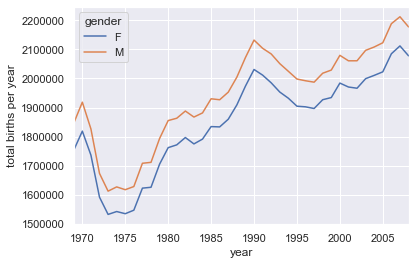

In [33]:
table.plot()
plt.ylabel('total births per year')

In [34]:
# 多条件筛选必须加 ()
births[(births['year'] > 1980) & (births['year'] < 1990)]

,year,month,day,gender,births,decade
9133,1981,1,1.0,F,3952,1980s
9134,1981,1,1.0,M,4347,1980s
9135,1981,1,2.0,F,4492,1980s
9136,1981,1,2.0,M,4553,1980s
9137,1981,1,3.0,F,4102,1980s
9138,1981,1,3.0,M,4356,1980s
9139,1981,1,4.0,F,4097,1980s
9140,1981,1,4.0,M,4198,1980s
9141,1981,1,5.0,F,4655,1980s
9142,1981,1,5.0,M,4959,1980s


画出不同年代不同星期的日均出生数据

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

尝试用日期构建一个星期的索引，发现 day 中有缺失值，需要去掉。

这里采用 sigma 消除法（sigma-clipping），sigma 消除法也是去除数据中噪音的方法。它按照正态分布标准差划定范围，只取均值左右指定个数（这里是5个）标准差范围内的数据。

In [ ]:
quartiles = np.percentile(births['births'], [25, 50, 75])
#quartiles

# 均值，等同于births['births'].median()
mu = quartiles[1]
# print('mu: '+mu.astype(str))

# 75 percentile 和 25 percentile 之间的差异被成为 interquartile range (简称IQR)
# 系数 0.74 将 IQR 转换成正态分布的标准差
sig = 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)' )
births.describe()

其次，要获得每条数据对应的 dayofweek 值，下面利用数据的索引来完成这一计算。

In [ ]:
births['day']=births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
print(births.index[0].year)

增加一列记录 dayofweek，用它作为透视表的索引，即可视化时的横轴。

In [ ]:
births['dayofweek'] = births.index.dayofweek
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')

另一个有趣的图表是画出各个年份平均每天的出生人数，按照月和日两个维度分别对数据进行分组：

In [ ]:
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.index

可以看出，得到是一个由月、日构成的二级索引，接下来需要将日期平整到一年的365天中。可以通过构建一个虚拟索引来解决，将出生日期统一到一年中，因为年份此时变得不重要。但是必须是闰年，因为有2月29日，否则会报错

In [ ]:
births_by_date.index = [pd.datetime(2016, month, day) 
                       for (month, day) in births_by_date.index]
births_by_date.index

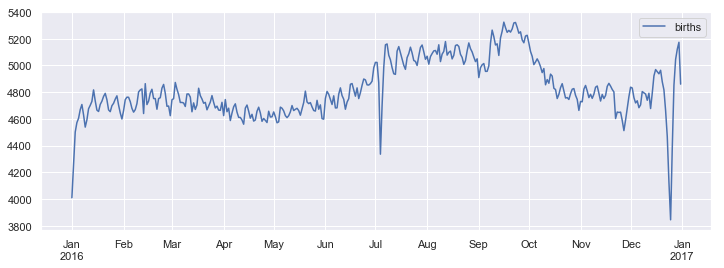

In [83]:
fig,ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax);